Setup

In [235]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt 
# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

Get the data


In [90]:
Adult_TestDataset = pd.read_csv("Adult_TestDataset.csv")  
Adult_TrainDataset = pd.read_csv("Adult_TrainDataset.csv")

Take a Quick Look at the Data Structure


In [236]:
Adult_TestDataset.head()

,Age,Work_Class,Final_Weight,Education,Education-Number,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours-Per-Week,Native_Country,Income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


Let’s take a look at the top five rows using the DataFrame’s head() method 
Each row represents one person . There are 15 attributes (you can see the first 5)

In [92]:
Adult_TrainDataset.head()

,Age,Work_Class,Final_Weight,Education,Education-Number,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours-Per-Week,Native_Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [227]:

Adult_TrainDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               32561 non-null  int64 
 1   Work_Class        32561 non-null  object
 2   Final_Weight      32561 non-null  int64 
 3   Education         32561 non-null  object
 4   Education-Number  32561 non-null  int64 
 5   Marital_Status    32561 non-null  object
 6   Occupation        32561 non-null  object
 7   Relationship      32561 non-null  object
 8   Race              32561 non-null  object
 9   Sex               32561 non-null  object
 10  Capital_Gain      32561 non-null  int64 
 11  Capital_Loss      32561 non-null  int64 
 12  Hours-Per-Week    32561 non-null  int64 
 13  Native_Country    32561 non-null  object
 14  Income            32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


The info() method is useful to get a quick description of the data, in particular the
total number of rows, and each attribute’s type and number of non-null values 

In [94]:

Adult_TrainDataset["Work_Class"].value_counts()                        

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: Work_Class, dtype: int64

We can find out what categories exist and how many
attribute’s belong to each category by using the value_counts() method

In [95]:
Adult_TrainDataset["Education"].value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: Education, dtype: int64

In [96]:
Adult_TrainDataset["Marital_Status"].value_counts()

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: Marital_Status, dtype: int64

In [97]:
Adult_TrainDataset["Occupation"].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: Occupation, dtype: int64

In [98]:
Adult_TrainDataset["Relationship"].value_counts()

Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: Relationship, dtype: int64

In [99]:
Adult_TrainDataset["Race"].value_counts()

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: Race, dtype: int64

In [100]:
Adult_TrainDataset["Sex"].value_counts()

Male      21790
Female    10771
Name: Sex, dtype: int64

In [101]:
Adult_TrainDataset["Native_Country"].value_counts()

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                      

In [102]:
Adult_TrainDataset["Income"].value_counts()

<=50K    24720
>50K      7841
Name: Income, dtype: int64

In [228]:

Adult_TrainDataset.describe()

,Age,Final_Weight,Education-Number,Capital_Gain,Capital_Loss,Hours-Per-Week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Let’s look at the other fields. The describe() method shows a summary of the
numerical attributes

Discover and visualize the data to gain insights


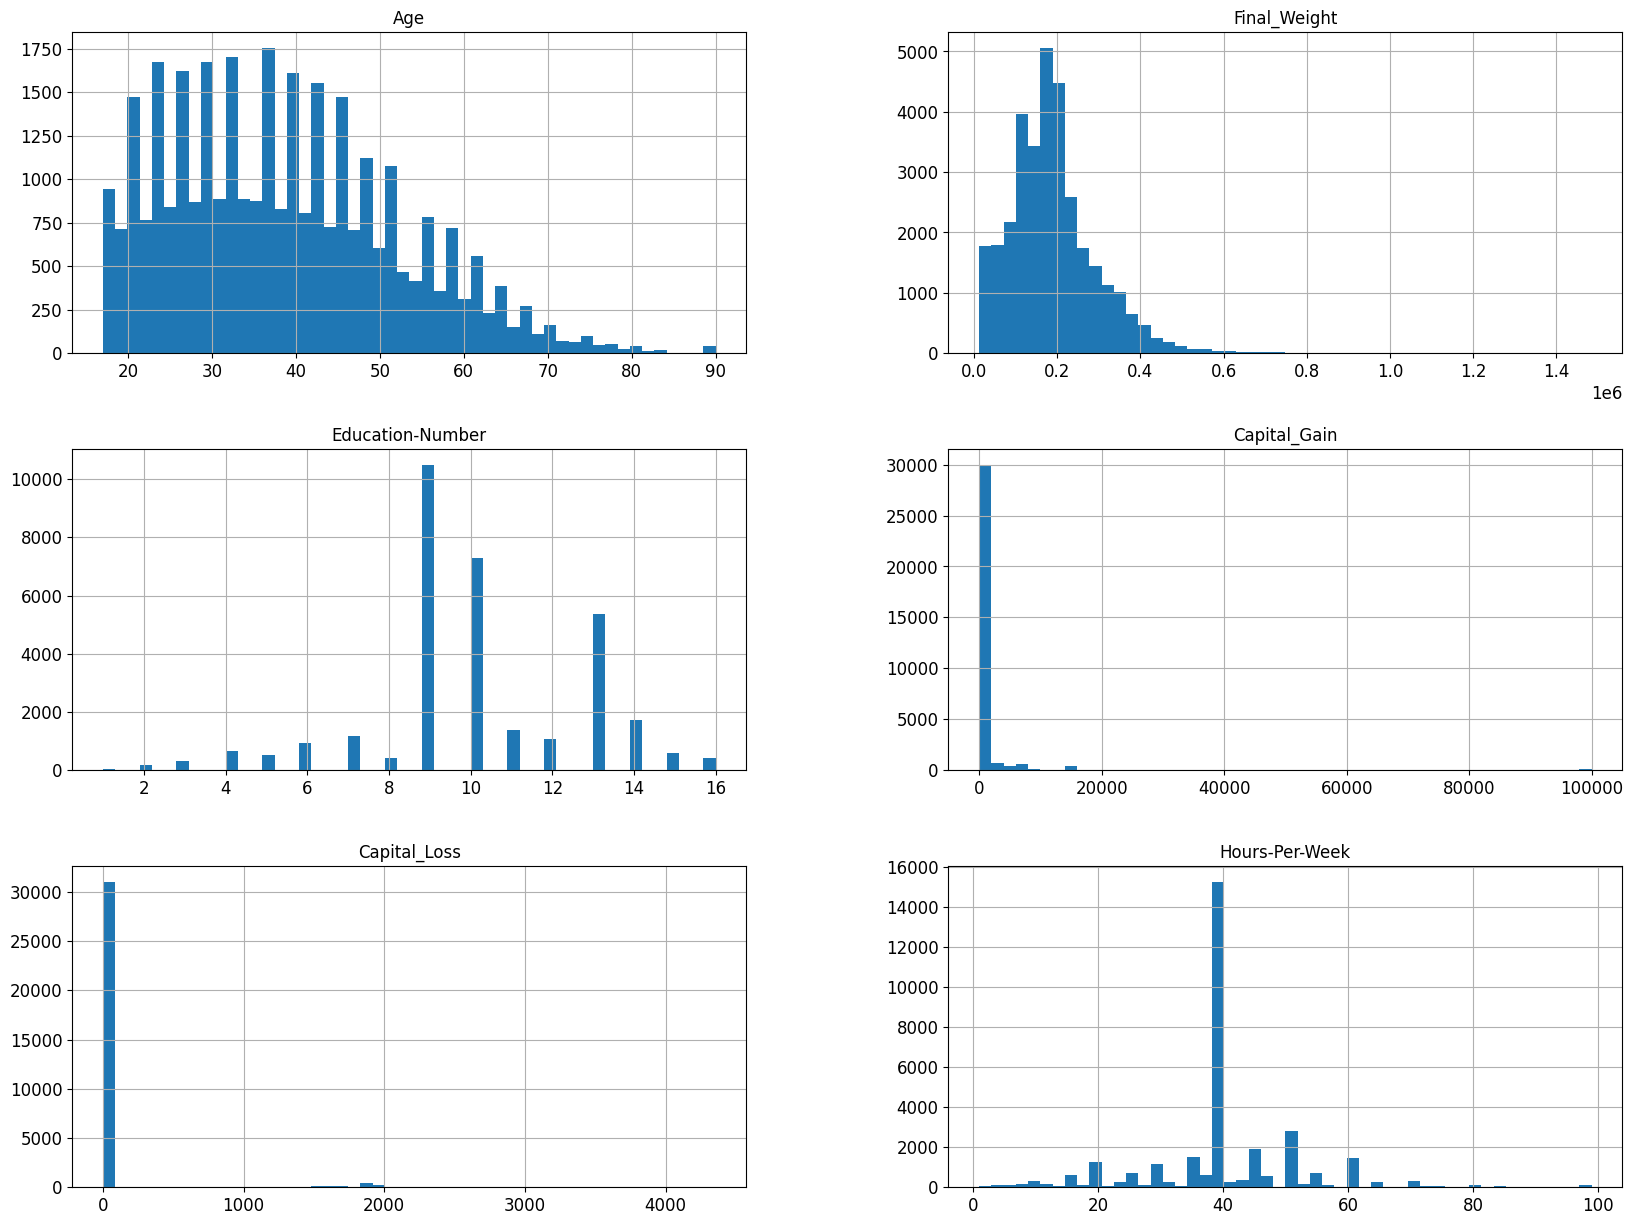

In [229]:

%matplotlib inline
import matplotlib.pyplot as plt
Adult_TrainDataset.hist(bins=50, figsize=(20,15))
plt.show()

So far we have only taken a quick glance at the data to get a general understanding of
the kind of data you are manipulating. Now the goal is to go a little bit more in depth

<AxesSubplot:>

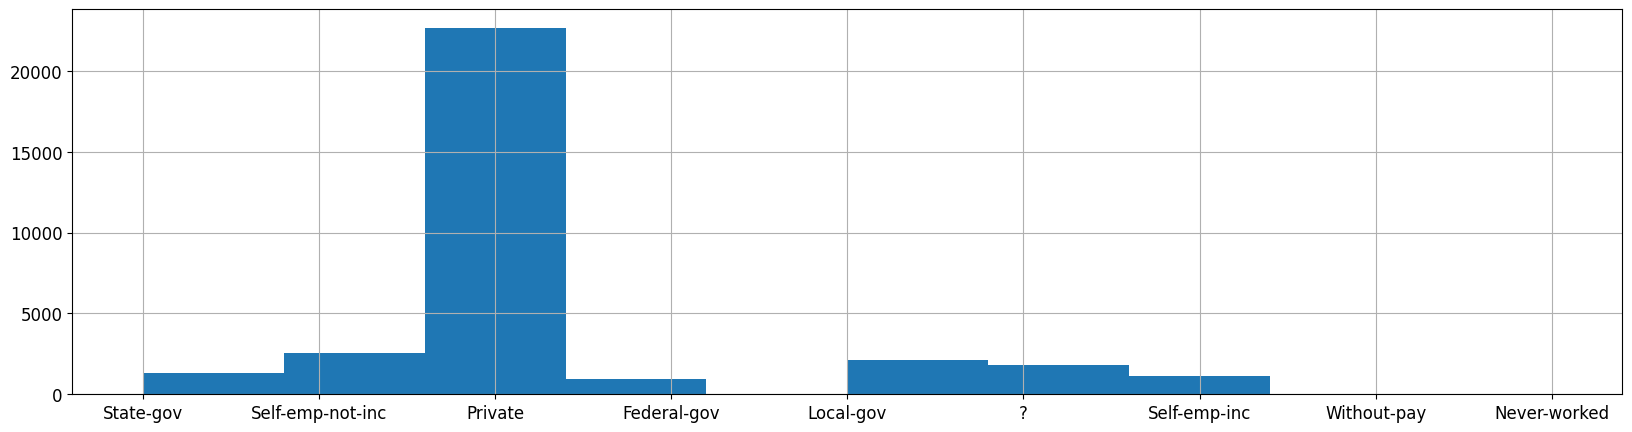

In [18]:
Adult_TrainDataset["Work_Class"].hist(figsize=(20,5))

<AxesSubplot:>

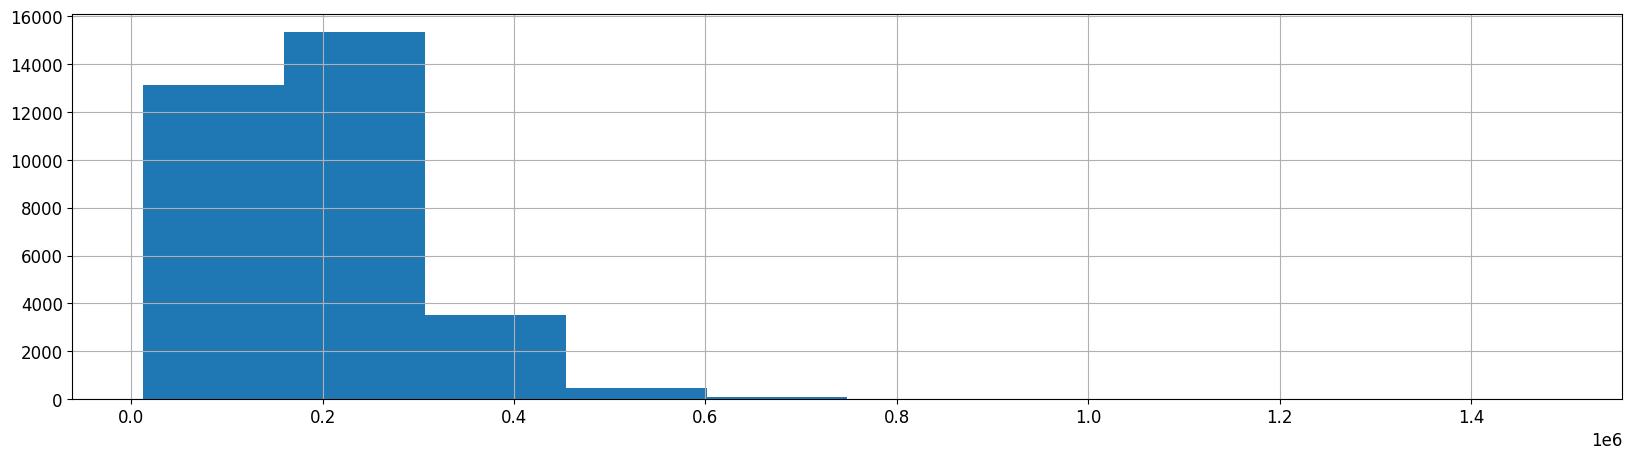

In [19]:
Adult_TrainDataset["Final_Weight"].hist(figsize=(20,5))


<AxesSubplot:>

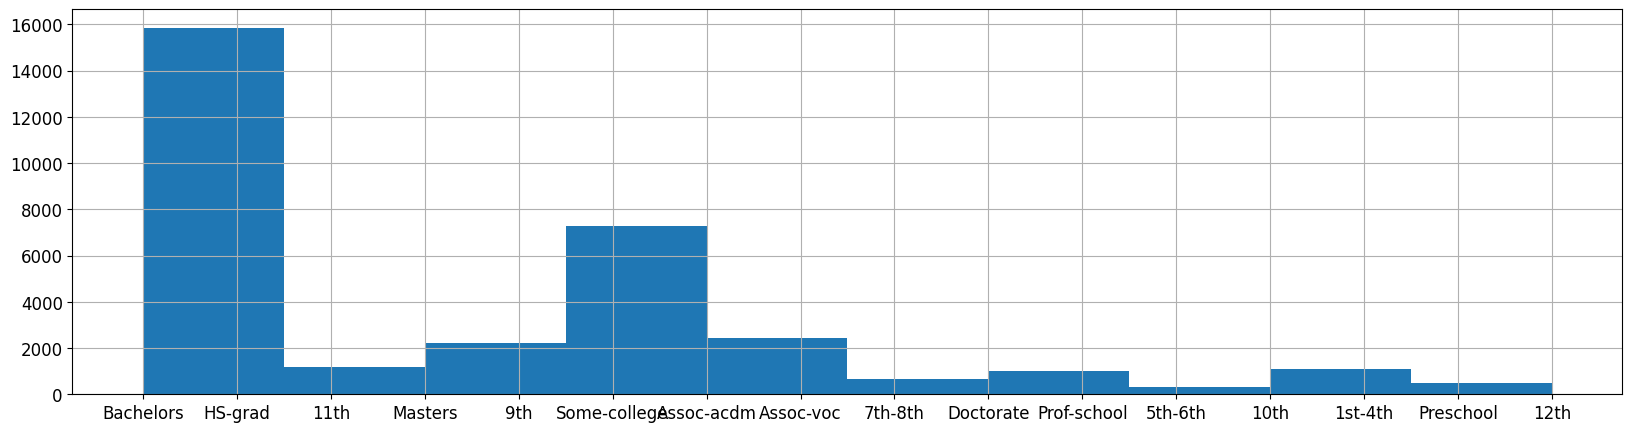

In [20]:
Adult_TrainDataset["Education"].hist(figsize=(20,5))


<AxesSubplot:>

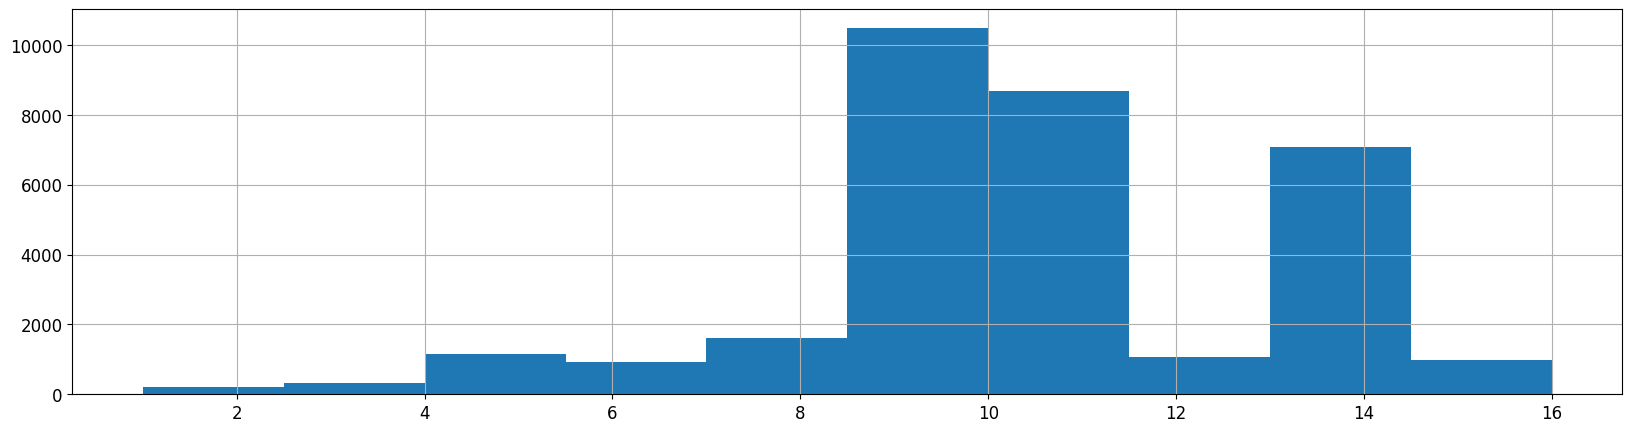

In [21]:
Adult_TrainDataset["Education-Number"].hist(figsize=(20,5))


<AxesSubplot:>

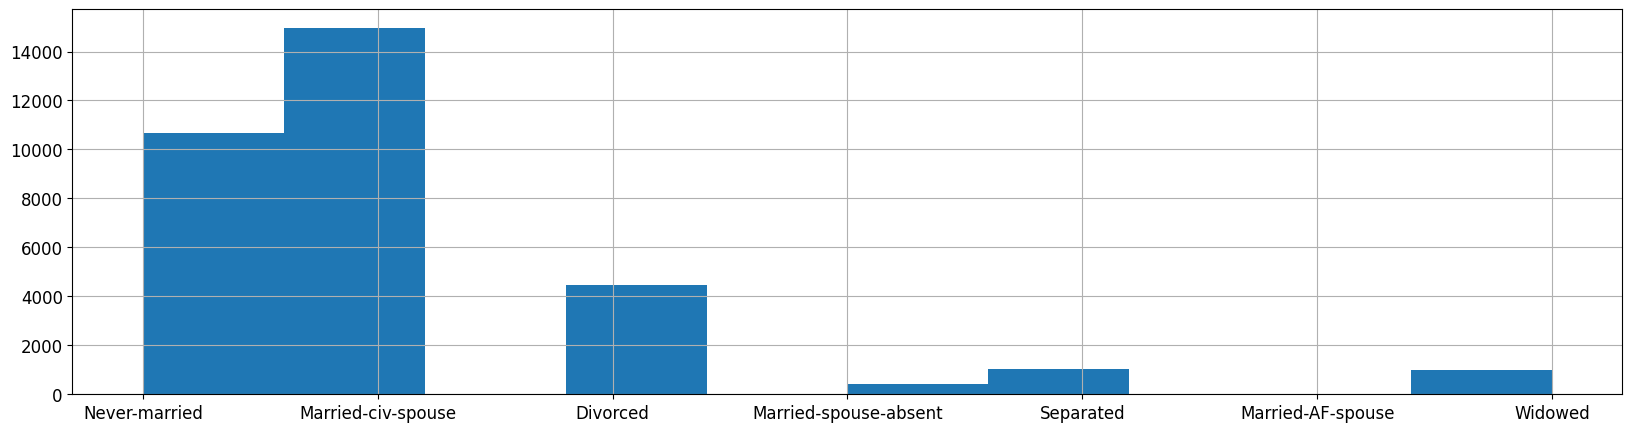

In [22]:
Adult_TrainDataset["Marital_Status"].hist(figsize=(20,5))


<AxesSubplot:>

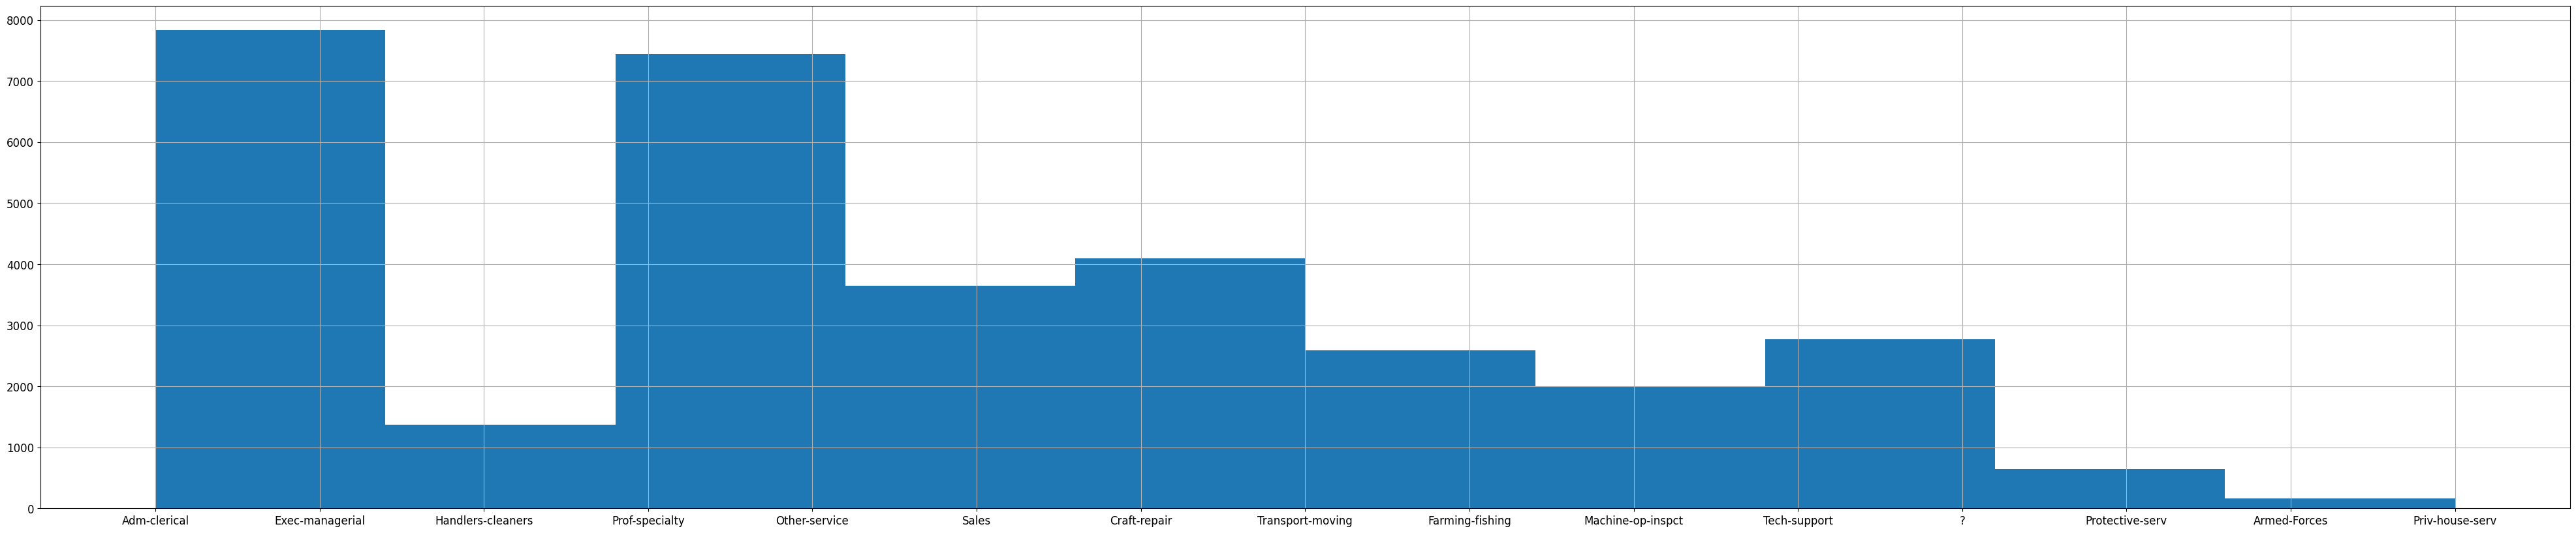

In [23]:
Adult_TrainDataset["Occupation"].hist(figsize=(50 , 10))


<AxesSubplot:>

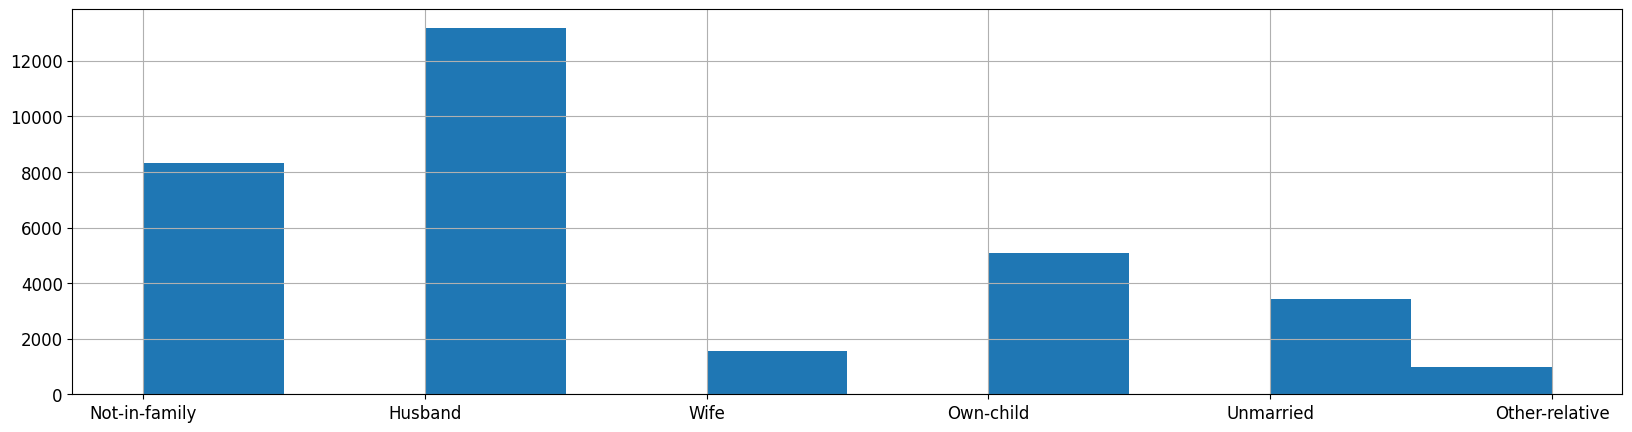

In [24]:
Adult_TrainDataset["Relationship"].hist(figsize=(20,5))


<AxesSubplot:>

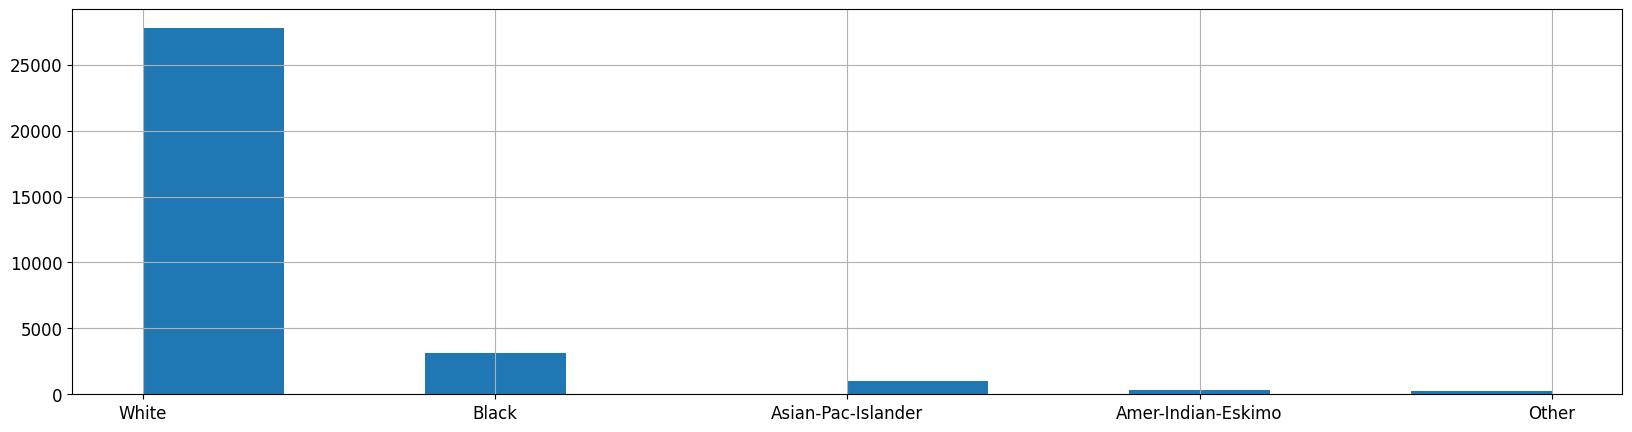

In [25]:
Adult_TrainDataset["Race"].hist(figsize=(20,5))


<AxesSubplot:>

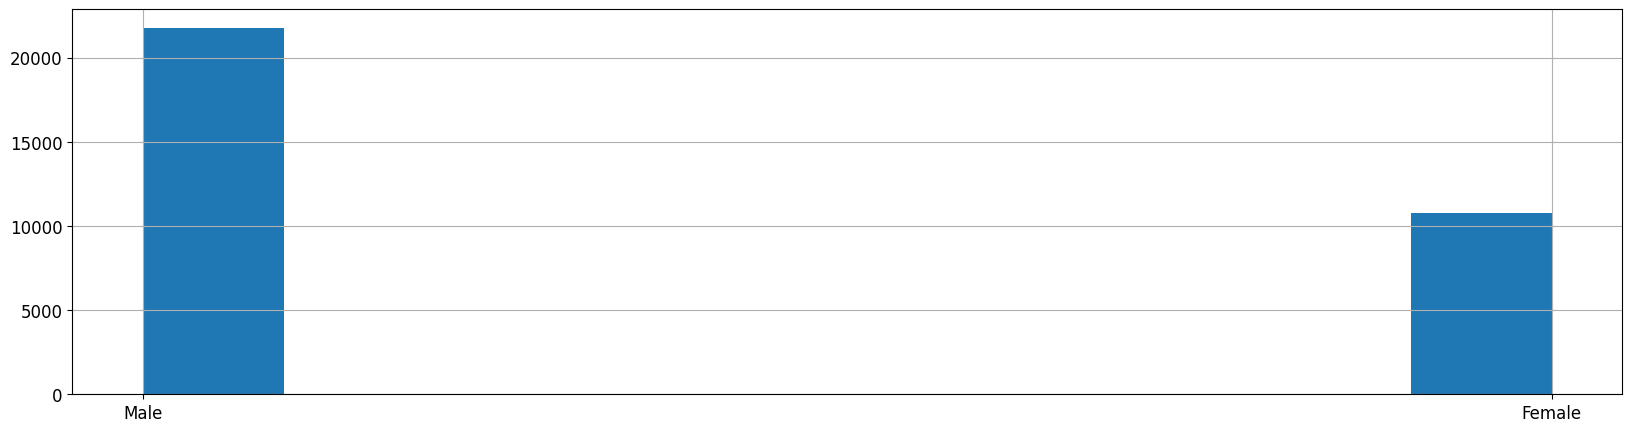

In [26]:
Adult_TrainDataset["Sex"].hist(figsize=(20,5))


<AxesSubplot:>

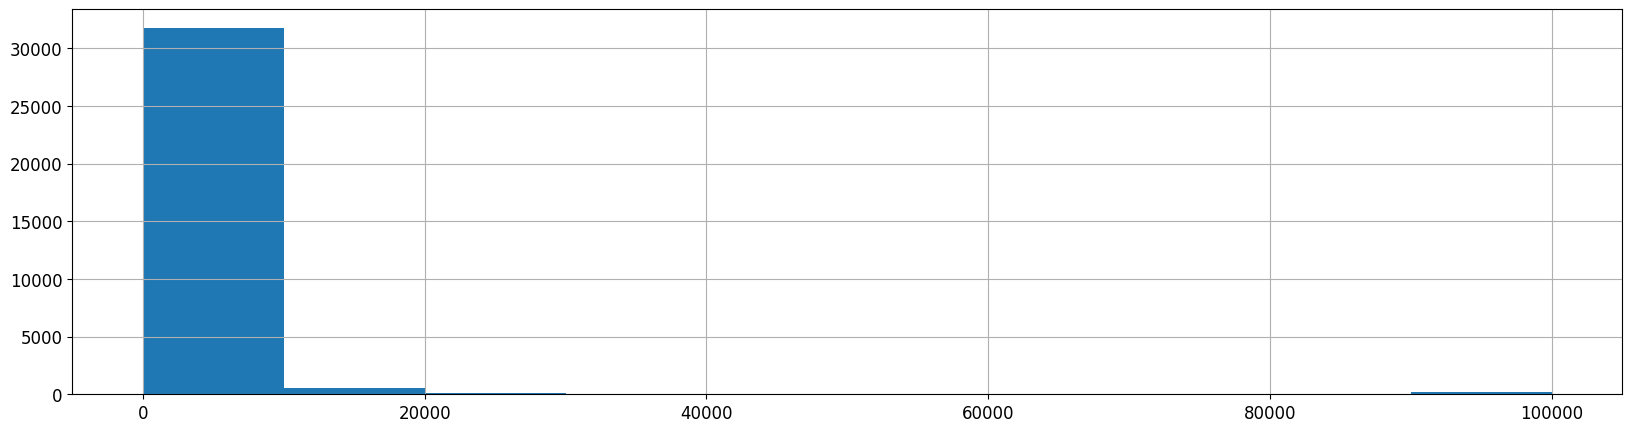

In [27]:
Adult_TrainDataset["Capital_Gain"].hist(figsize=(20,5))


<AxesSubplot:>

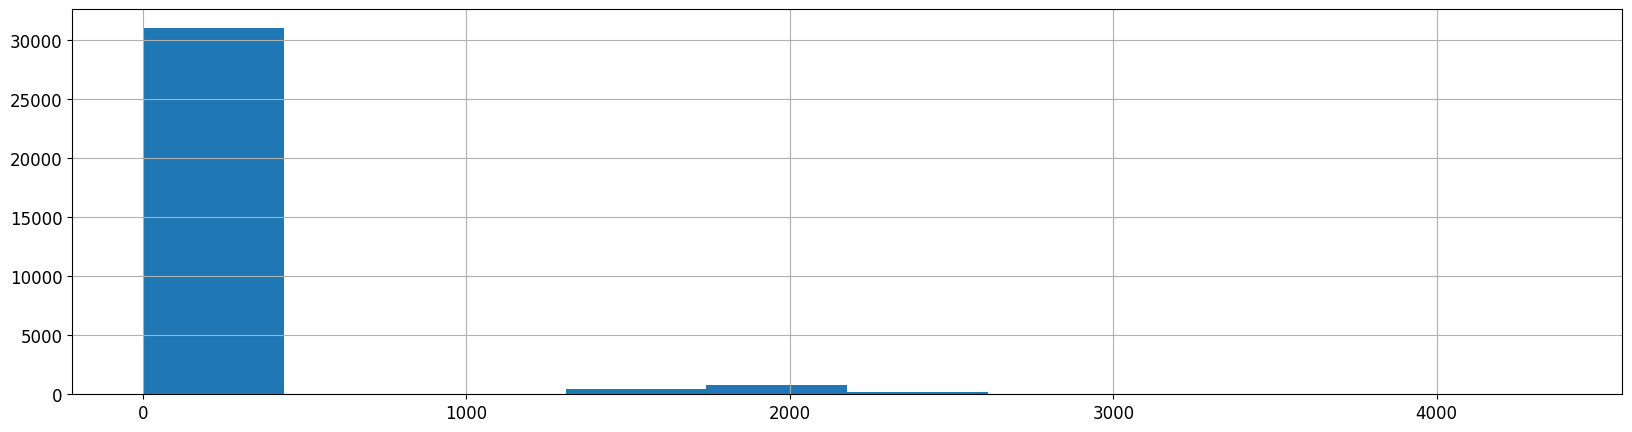

In [28]:
Adult_TrainDataset["Capital_Loss"].hist(figsize=(20,5))


<AxesSubplot:>

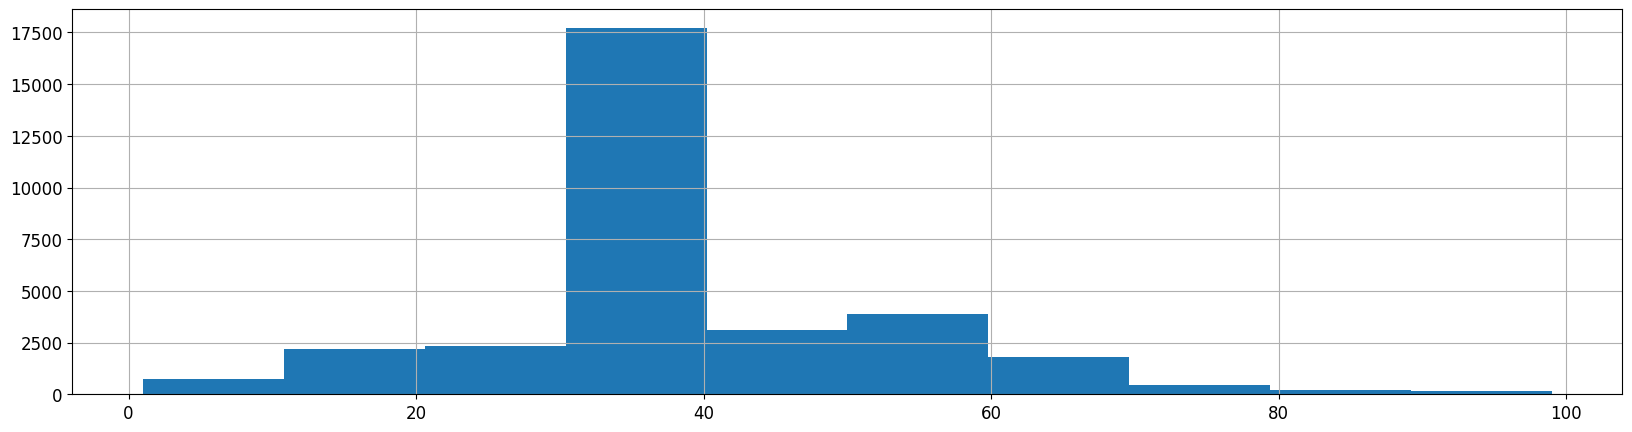

In [29]:
Adult_TrainDataset["Hours-Per-Week"].hist(figsize=(20,5))


<AxesSubplot:>

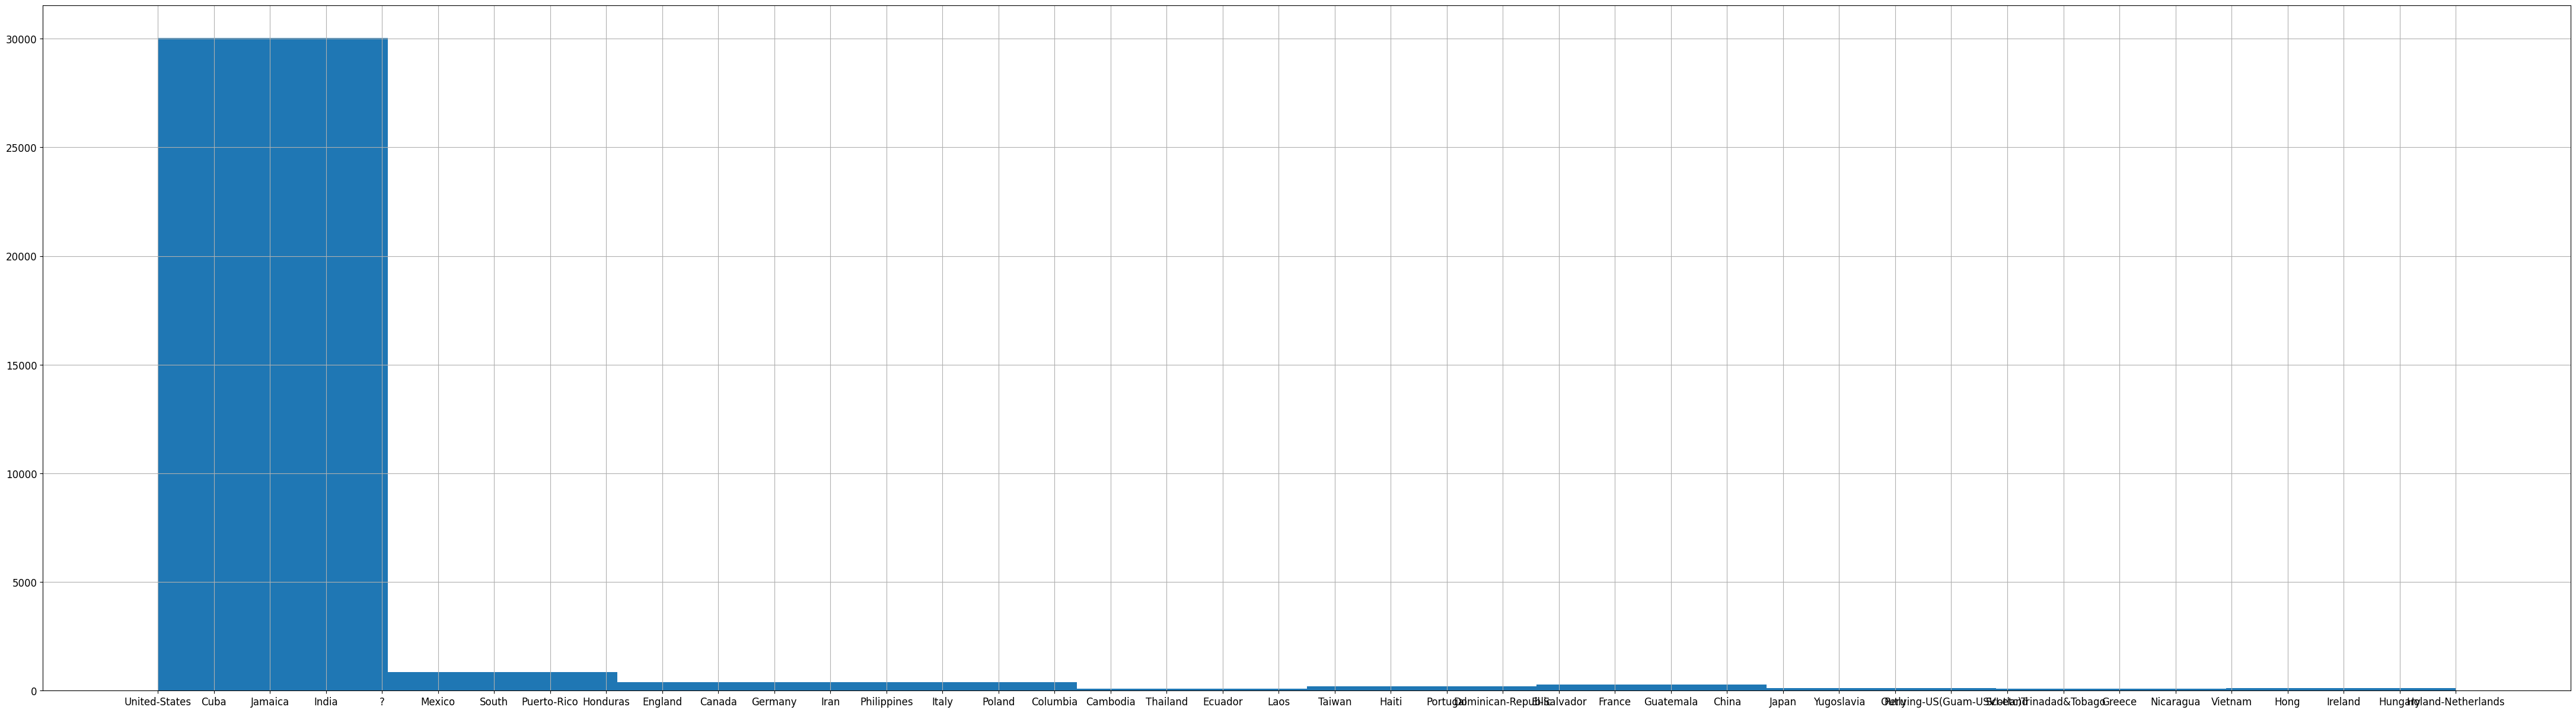

In [30]:
Adult_TrainDataset["Native_Country"].hist(figsize=(55,15))


<AxesSubplot:>

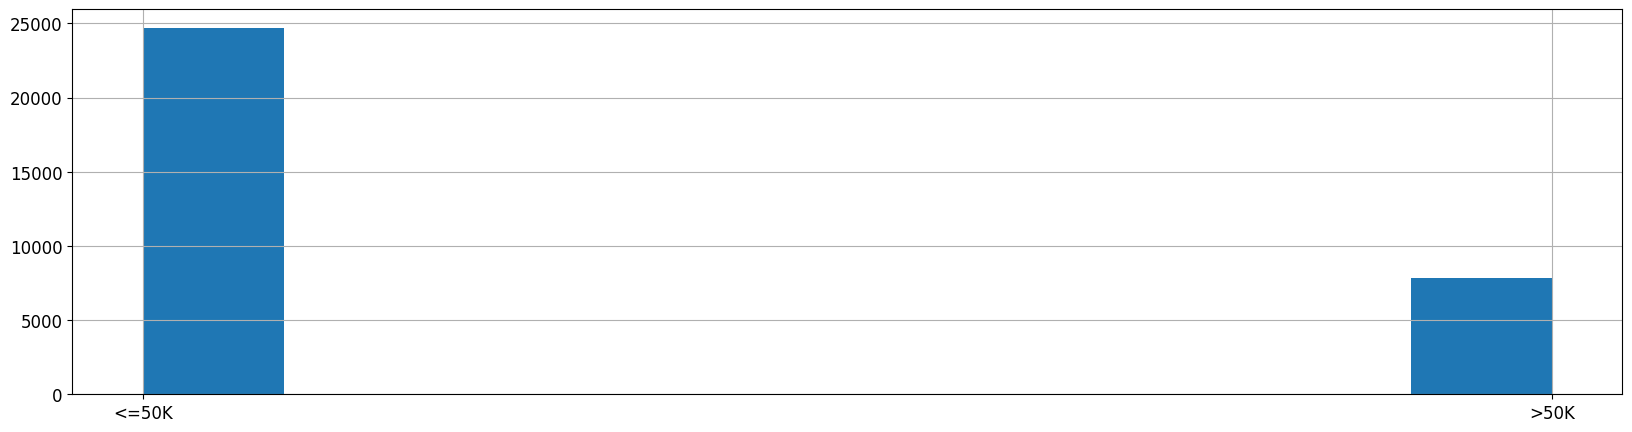

In [31]:
Adult_TrainDataset["Income"].hist(figsize=(20,5))


<AxesSubplot:xlabel='Hours-Per-Week', ylabel='Income'>

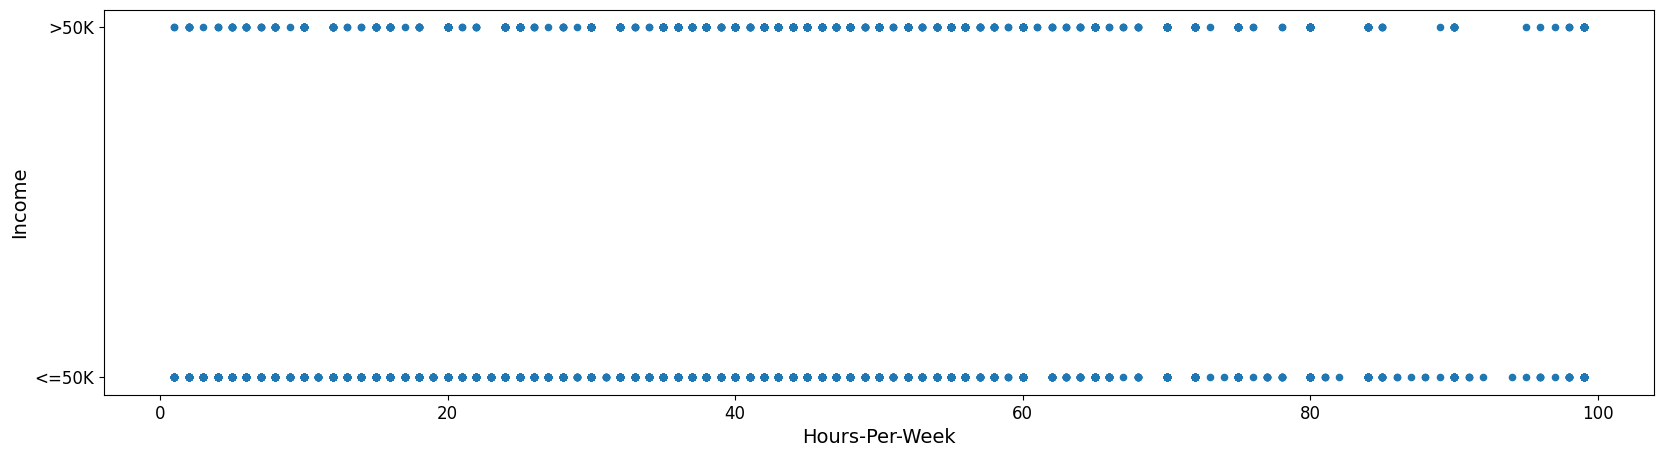

In [32]:
Adult_TrainDataset.plot(kind="scatter", x ="Hours-Per-Week", y = "Income" , figsize=(20,5))

<AxesSubplot:xlabel='Occupation', ylabel='Income'>

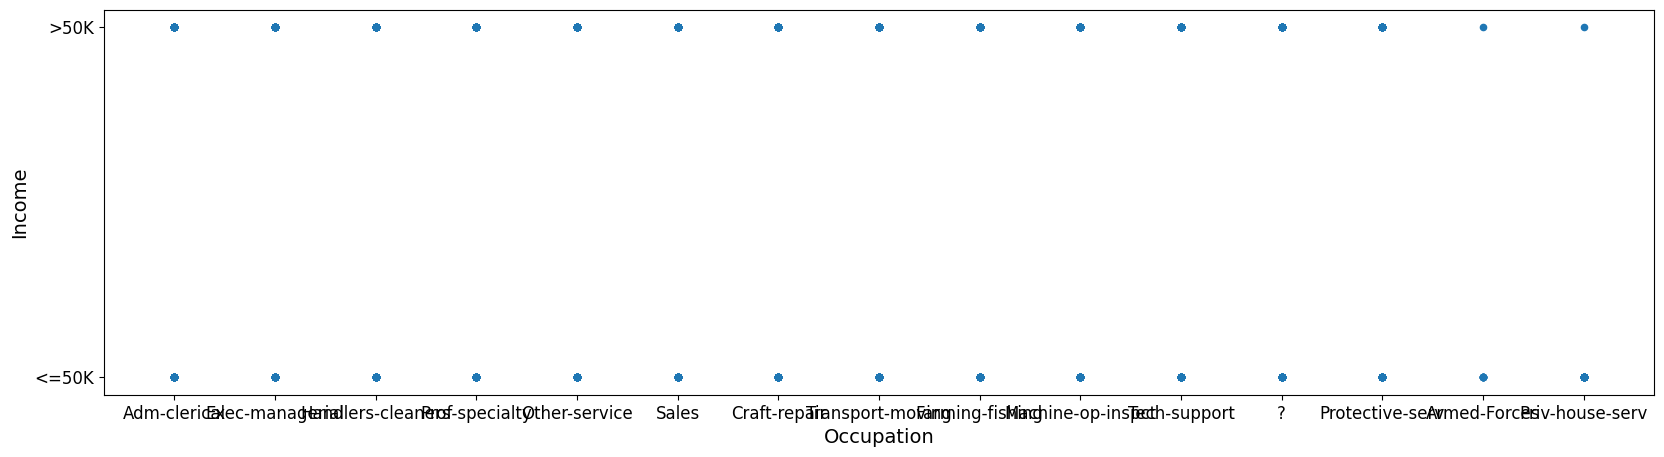

In [33]:
Adult_TrainDataset.plot(kind="scatter", x ="Occupation", y = "Income" , figsize=(20,5))

Looking for Correlations


In [230]:
Adult_TrainDataset.corr()

,Age,Final_Weight,Education-Number,Capital_Gain,Capital_Loss,Hours-Per-Week
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
Final_Weight,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
Education-Number,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
Capital_Gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
Capital_Loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
Hours-Per-Week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


Since the dataset is not too large, you can easily compute the standard correlation
coeffcient (also called Pearson’s r) between every pair of attributes using the corr()
method:
The correlation coefficient ranges from –1 to 1. When it is close to 1, it means that
there is a strong positive correlation
Finally, coefficients close to zero mean that there is no
linear correlation

In [231]:
Adult_TrainDataset.describe()

,Age,Final_Weight,Education-Number,Capital_Gain,Capital_Loss,Hours-Per-Week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Let’s look at the other fields. The describe() method shows a summary of the
numerical attributes

array([[<AxesSubplot:xlabel='Age', ylabel='Age'>,
        <AxesSubplot:xlabel='Final_Weight', ylabel='Age'>,
        <AxesSubplot:xlabel='Education-Number', ylabel='Age'>,
        <AxesSubplot:xlabel='Capital_Gain', ylabel='Age'>],
       [<AxesSubplot:xlabel='Age', ylabel='Final_Weight'>,
        <AxesSubplot:xlabel='Final_Weight', ylabel='Final_Weight'>,
        <AxesSubplot:xlabel='Education-Number', ylabel='Final_Weight'>,
        <AxesSubplot:xlabel='Capital_Gain', ylabel='Final_Weight'>],
       [<AxesSubplot:xlabel='Age', ylabel='Education-Number'>,
        <AxesSubplot:xlabel='Final_Weight', ylabel='Education-Number'>,
        <AxesSubplot:xlabel='Education-Number', ylabel='Education-Number'>,
        <AxesSubplot:xlabel='Capital_Gain', ylabel='Education-Number'>],
       [<AxesSubplot:xlabel='Age', ylabel='Capital_Gain'>,
        <AxesSubplot:xlabel='Final_Weight', ylabel='Capital_Gain'>,
        <AxesSubplot:xlabel='Education-Number', ylabel='Capital_Gain'>,
        <AxesSubp

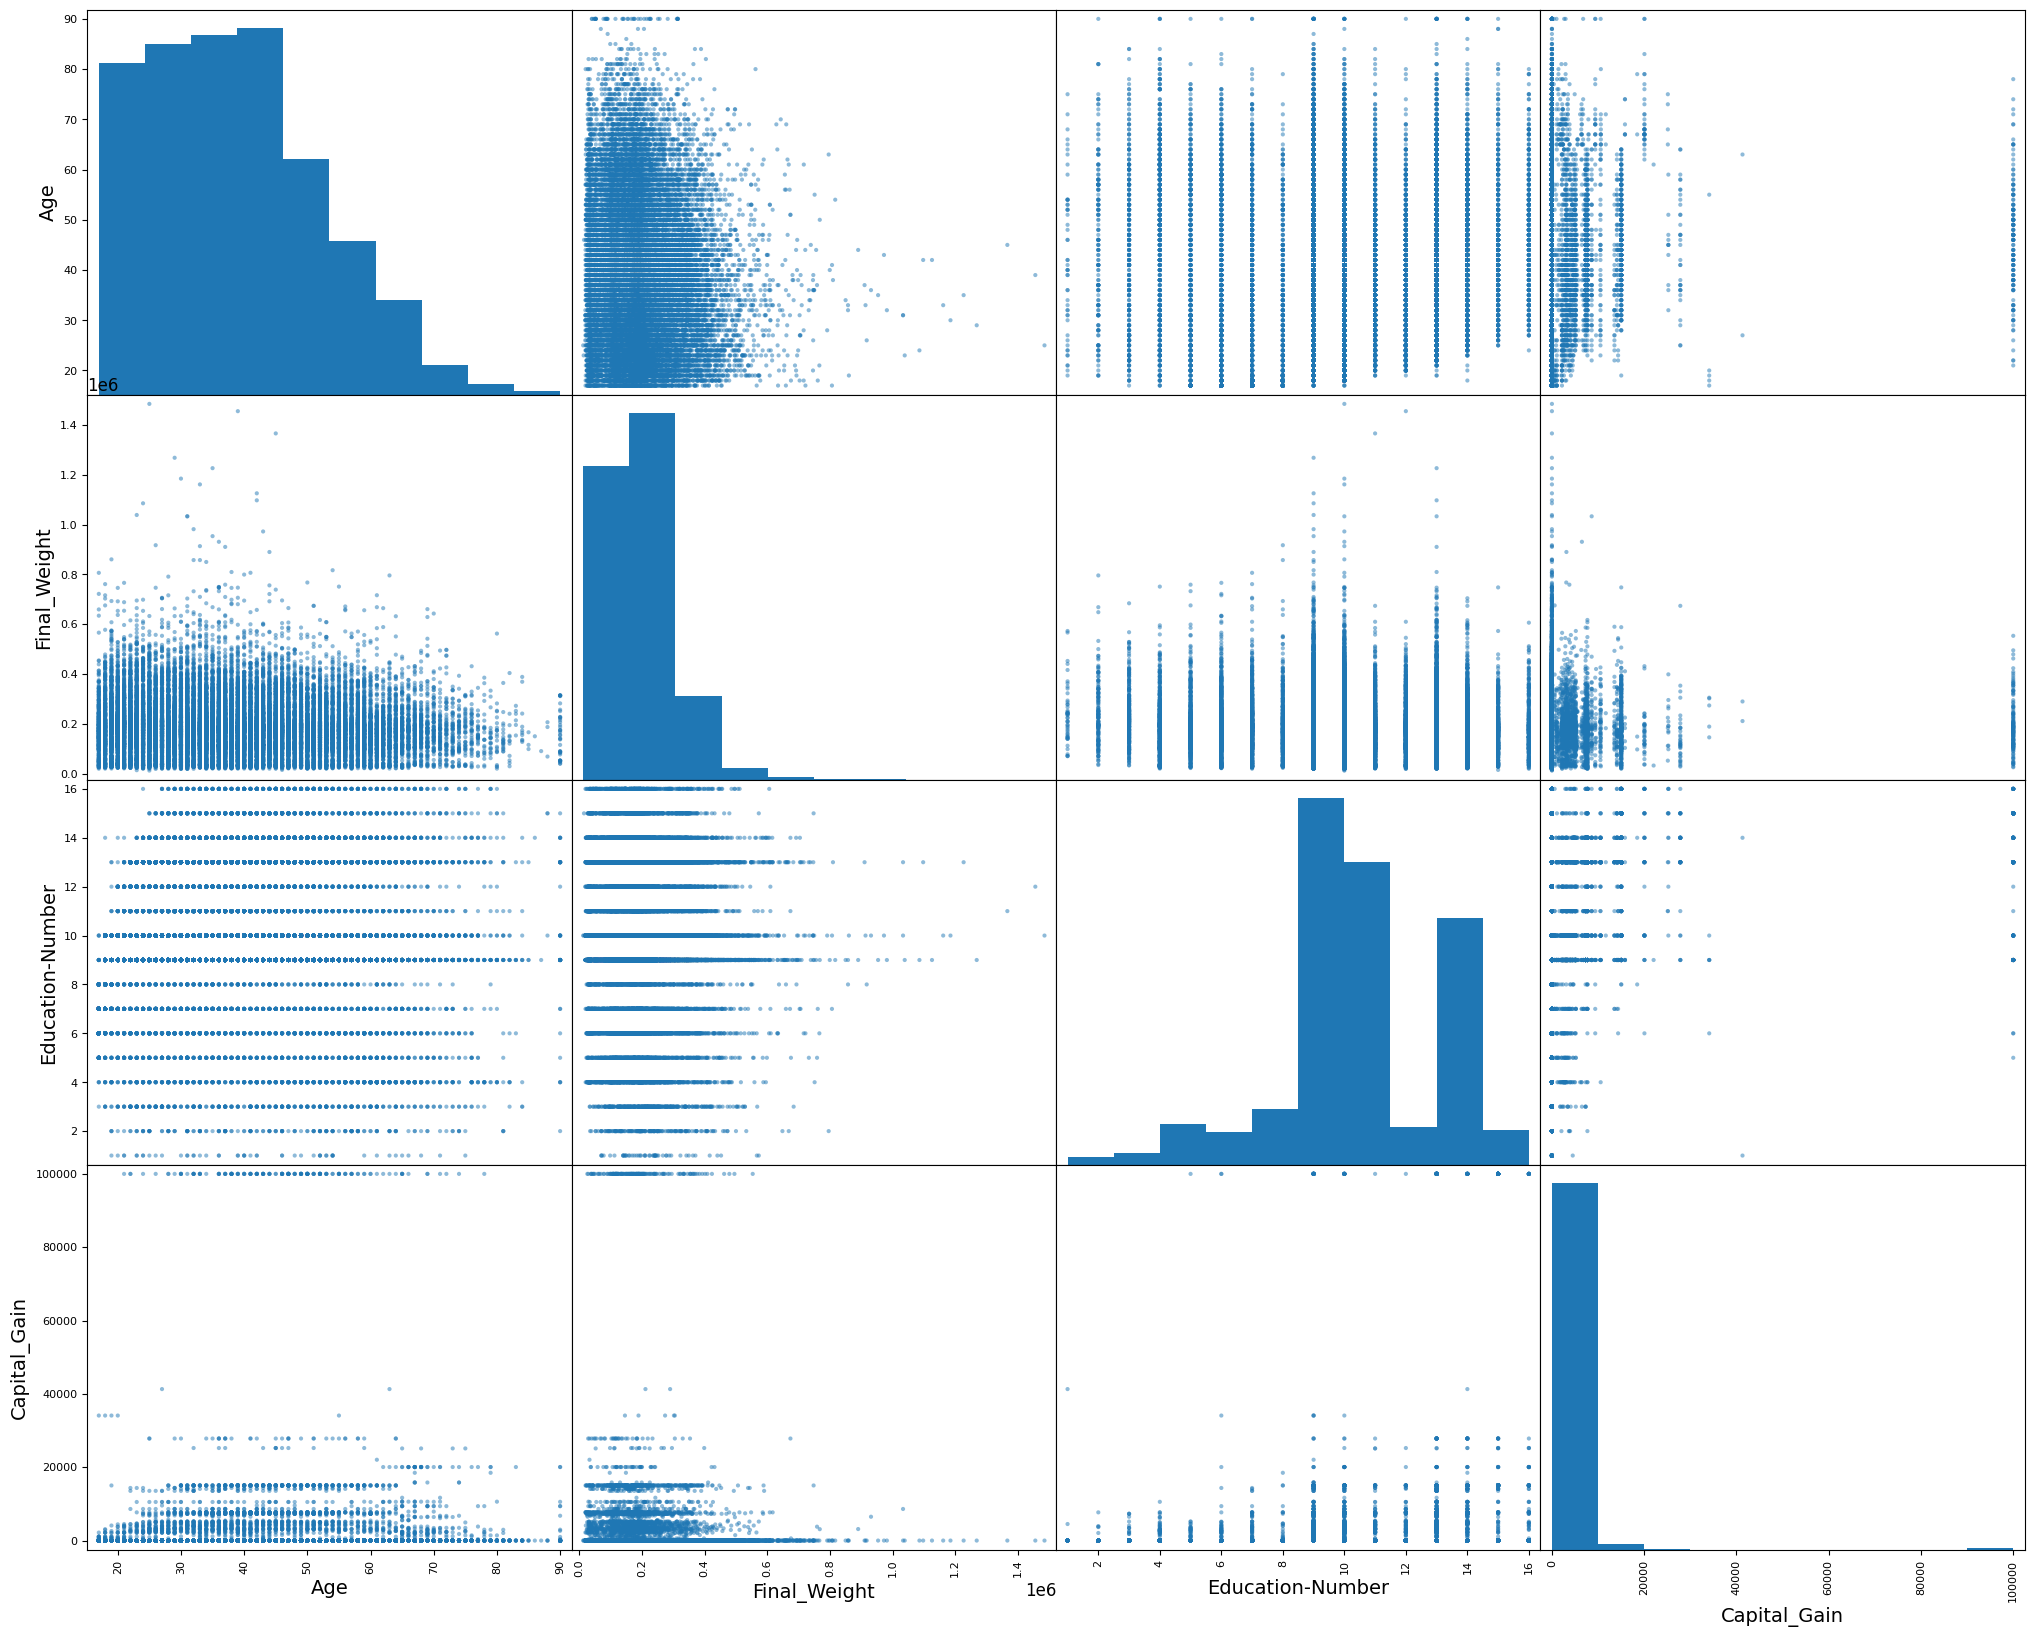

In [110]:
import pandas as pd
attributes = ["Age", "Final_Weight", "Education-Number","Capital_Gain"]
pd.plotting.scatter_matrix(Adult_TrainDataset[attributes], figsize=(25, 20))

Another way to check for correlation between attributes is to use Pandas’
scatter_matrix function, which plots every numerical attribute against every other
numerical attribute

Prepare the data for Machine Learning algorithms 




handle missing features and Handling Text and Categorical Attributes


In [201]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer   
train_set = Adult_TrainDataset.replace('?',np.NaN)     
x_train_set = train_set.drop("Income" , axis=1)       # split data to x and y(lable)
y_train_set = train_set["Income"]
print(x_train_set.isna().sum())     # show Numbers of  missing values 
print("\n")
# replace missing values with the most_frequent
imputer = SimpleImputer(strategy="most_frequent")
imputer.fit(x_train_set)
print(imputer.statistics_)
print("\n")
Train_set = imputer.transform(x_train_set)
Train_set = pd.DataFrame(Train_set, columns=x_train_set.columns)
print(Train_set.isna().sum())    # show Numbers of  missing values after handling

Age                    0
Work_Class          1836
Final_Weight           0
Education              0
Education-Number       0
Marital_Status         0
Occupation          1843
Relationship           0
Race                   0
Sex                    0
Capital_Gain           0
Capital_Loss           0
Hours-Per-Week         0
Native_Country       583
dtype: int64


[36 'Private' 123011 'HS-grad' 9 'Married-civ-spouse' 'Prof-specialty'
 'Husband' 'White' 'Male' 0 0 40 'United-States']


Age                 0
Work_Class          0
Final_Weight        0
Education           0
Education-Number    0
Marital_Status      0
Occupation          0
Relationship        0
Race                0
Sex                 0
Capital_Gain        0
Capital_Loss        0
Hours-Per-Week      0
Native_Country      0
dtype: int64


replace missing values in csv file by NaN <br> show Numbers of  missing values <br> replace missing values with the most_frequent <br> show Numbers of  missing values after handling

In [202]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer 
test_set = Adult_TestDataset.replace('?',np.NaN)
x_test_set = test_set.drop("Income" , axis=1)
y_test_set = test_set["Income"]
print(x_test_set.isna().sum())
print("\n")
# replace missing values with the mode
imputer = SimpleImputer(strategy="most_frequent")
imputer.fit(x_test_set)
print(imputer.statistics_)
print("\n")
Test_set = imputer.transform(x_test_set)
Test_set = pd.DataFrame(Test_set, columns=x_test_set.columns)
print(Train_set.isna().sum())

Age                   0
Work_Class          963
Final_Weight          0
Education             0
Education-Number      0
Marital_Status        0
Occupation          966
Relationship          0
Race                  0
Sex                   0
Capital_Gain          0
Capital_Loss          0
Hours-Per-Week        0
Native_Country      274
dtype: int64


[35 'Private' 136986 'HS-grad' 9 'Married-civ-spouse' 'Prof-specialty'
 'Husband' 'White' 'Male' 0 0 40 'United-States']


Age                 0
Work_Class          0
Final_Weight        0
Education           0
Education-Number    0
Marital_Status      0
Occupation          0
Relationship        0
Race                0
Sex                 0
Capital_Gain        0
Capital_Loss        0
Hours-Per-Week      0
Native_Country      0
dtype: int64


In [203]:
Train_set.head(5)

,Age,Work_Class,Final_Weight,Education,Education-Number,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours-Per-Week,Native_Country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


LabelEncoder

In [204]:
Train_cat = Train_set[["Work_Class" , "Final_Weight" , "Education" ,
           "Marital_Status" ,"Occupation" ,"Relationship" ,
             "Race" ,"Sex" , "Native_Country"]]
Train_cat.head(10)

,Work_Class,Final_Weight,Education,Marital_Status,Occupation,Relationship,Race,Sex,Native_Country
0,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba
5,Private,284582,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States
6,Private,160187,9th,Married-spouse-absent,Other-service,Not-in-family,Black,Female,Jamaica
7,Self-emp-not-inc,209642,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
8,Private,45781,Masters,Never-married,Prof-specialty,Not-in-family,White,Female,United-States
9,Private,159449,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States


Most Machine Learning algorithms prefer to work with numbers anyway, so let’s convert these text labels to numbers.

In [205]:
Train_set.head(5)

,Age,Work_Class,Final_Weight,Education,Education-Number,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours-Per-Week,Native_Country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [208]:
Train_set_LabelEncoder = Train_set.copy()
Test_set_LabelEncoder = Test_set.copy()

In [209]:
from sklearn.preprocessing import  LabelEncoder
LabelEncoder = LabelEncoder()
Work_Class = LabelEncoder.fit_transform(Train_set["Work_Class"])
Work_Class = pd.DataFrame(Work_Class) 
Train_set_LabelEncoder["Work_Class"] = Work_Class

Final_Weight = LabelEncoder.fit_transform(Train_set["Final_Weight"])
Final_Weight = pd.DataFrame(Final_Weight) 
Train_set_LabelEncoder["Final_Weight"] = Final_Weight

Education = LabelEncoder.fit_transform(Train_set["Education"])
Education = pd.DataFrame(Education) 
Train_set_LabelEncoder["Education"] = Education

Marital_Status = LabelEncoder.fit_transform(Train_set["Marital_Status"])
Marital_Status = pd.DataFrame(Marital_Status) 
Train_set_LabelEncoder["Marital_Status"] = Marital_Status

Occupation = LabelEncoder.fit_transform(Train_set["Occupation"])
Occupation = pd.DataFrame(Occupation) 
Train_set_LabelEncoder["Occupation"] = Occupation

Relationship = LabelEncoder.fit_transform(Train_set["Relationship"])
Relationship = pd.DataFrame(Relationship) 
Train_set_LabelEncoder["Relationship"] = Relationship

Race = LabelEncoder.fit_transform(Train_set["Race"])
Race = pd.DataFrame(Race) 
Train_set_LabelEncoder["Race"] = Race

Sex = LabelEncoder.fit_transform(Train_set["Sex"])
Sex = pd.DataFrame(Sex) 
Train_set_LabelEncoder["Sex"] = Sex

Native_Country = LabelEncoder.fit_transform(Train_set["Native_Country"])
Native_Country = pd.DataFrame(Native_Country)  
Train_set_LabelEncoder["Native_Country"] = Native_Country



Scikit-Learn provides a transformer for this task called LabelEncoder: <br> and we decided to use this way of transform becuase it gives us 1D output <br> here we are using label encoder and then fit it to each attribute <br> after that we convert data to Dataframe and fix it to all CAT attribute

In [210]:
Train_set_LabelEncoder.head(5)

,Age,Work_Class,Final_Weight,Education,Education-Number,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours-Per-Week,Native_Country
0,39,6,2671,9,13,4,0,1,4,1,2174,0,40,38
1,50,5,2926,9,13,2,3,0,4,1,0,0,13,38
2,38,3,14086,11,9,0,5,1,4,1,0,0,40,38
3,53,3,15336,1,7,2,5,0,2,1,0,0,40,38
4,28,3,19355,9,13,2,9,5,2,0,0,0,40,4


In [211]:
from sklearn.preprocessing import  LabelEncoder
LabelEncoder = LabelEncoder()
Work_Class = LabelEncoder.fit_transform(Test_set["Work_Class"])
Work_Class = pd.DataFrame(Work_Class) 
Test_set_LabelEncoder["Work_Class"] = Work_Class

Final_Weight = LabelEncoder.fit_transform(Test_set["Final_Weight"])
Final_Weight = pd.DataFrame(Final_Weight) 
Test_set_LabelEncoder["Final_Weight"] = Final_Weight

Education = LabelEncoder.fit_transform(Test_set["Education"])
Education = pd.DataFrame(Education) 
Test_set_LabelEncoder["Education"] = Education

Marital_Status = LabelEncoder.fit_transform(Test_set["Marital_Status"])
Marital_Status = pd.DataFrame(Marital_Status) 
Test_set_LabelEncoder["Marital_Status"] = Marital_Status

Occupation = LabelEncoder.fit_transform(Test_set["Occupation"])
Occupation = pd.DataFrame(Occupation) 
Test_set_LabelEncoder["Occupation"] = Occupation

Relationship = LabelEncoder.fit_transform(Test_set["Relationship"])
Relationship = pd.DataFrame(Relationship) 
Test_set_LabelEncoder["Relationship"] = Relationship

Race = LabelEncoder.fit_transform(Test_set["Race"])
Race = pd.DataFrame(Race) 
Test_set_LabelEncoder["Race"] = Race

Sex = LabelEncoder.fit_transform(Test_set["Sex"])
Sex = pd.DataFrame(Sex) 
Test_set_LabelEncoder["Sex"] = Sex

Native_Country = LabelEncoder.fit_transform(Test_set["Native_Country"])
Native_Country = pd.DataFrame(Native_Country)  
Test_set_LabelEncoder["Native_Country"] = Native_Country


like Train_set we do above code  for Test_set

In [212]:
Test_set_LabelEncoder.head(5)

,Age,Work_Class,Final_Weight,Education,Education-Number,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours-Per-Week,Native_Country
0,25,3,8931,1,7,4,6,3,2,1,0,0,40,37
1,38,3,1888,11,9,2,4,0,4,1,0,0,50,37
2,28,1,11540,7,12,2,10,0,4,1,0,0,40,37
3,44,3,5146,15,10,2,6,0,2,1,7688,0,40,37
4,18,3,2450,15,10,4,9,3,4,0,0,0,30,37


OneHotEncoder

In [232]:
from sklearn.preprocessing import OneHotEncoder
HotEncoder = OneHotEncoder()
Train_set_HotEncoder = HotEncoder.fit_transform(Train_set[["Work_Class"]])

The problem is that it increases dimensionality so training becomes slower and more complex. 
It can also create sparse data since most entries in the new columns will be zero. Additionally,
one-hot encoding takes more space but adds no new information since it only changes data representation

In [175]:
Train_set_HotEncoder.head(5)

,0,1,2,3,4,5,6,7
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


Feature Scaling


In [214]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(Train_set_LabelEncoder)
Train_set_scaled = pd.DataFrame(scaled, columns=Train_set_LabelEncoder.columns)
Train_set_scaled.head(10)

,Age,Work_Class,Final_Weight,Education,Education-Number,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours-Per-Week,Native_Country
0,0.301370,0.857143,0.123389,0.600000,0.800000,0.666667,0.000000,0.2,1.0,1.0,0.021740,0.0,0.397959,0.95
1,0.452055,0.714286,0.135169,0.600000,0.800000,0.333333,0.230769,0.0,1.0,1.0,0.000000,0.0,0.122449,0.95
2,0.287671,0.428571,0.650714,0.733333,0.533333,0.000000,0.384615,0.2,1.0,1.0,0.000000,0.0,0.397959,0.95
3,0.493151,0.428571,0.708458,0.066667,0.400000,0.333333,0.384615,0.0,0.5,1.0,0.000000,0.0,0.397959,0.95
4,0.150685,0.428571,0.894119,0.600000,0.800000,0.333333,0.692308,1.0,0.5,0.0,0.000000,0.0,0.397959,0.10
5,0.273973,0.428571,0.817665,0.800000,0.866667,0.333333,0.230769,1.0,1.0,0.0,0.000000,0.0,0.397959,0.95
6,0.438356,0.428571,0.394327,0.400000,0.266667,0.500000,0.538462,0.2,0.5,0.0,0.000000,0.0,0.153061,0.55
7,0.479452,0.714286,0.629186,0.733333,0.533333,0.333333,0.230769,0.0,1.0,1.0,0.000000,0.0,0.448980,0.95
8,0.191781,0.428571,0.060886,0.800000,0.866667,0.666667,0.692308,0.2,1.0,0.0,0.140841,0.0,0.500000,0.95
9,0.342466,0.428571,0.390816,0.600000,0.800000,0.333333,0.230769,0.0,1.0,1.0,0.051781,0.0,0.397959,0.95


One of the most important transformations you need to apply to your data is feature
scaling. With few exceptions, Machine Learning algorithms don’t perform well when
the input numerical attributes have very different scales

In [215]:
from sklearn.preprocessing import MinMaxScaler
scaler1 = MinMaxScaler()
scaled2 = scaler1.fit_transform(Test_set_LabelEncoder)
Test_set_scaled = pd.DataFrame(scaled2, columns=Test_set_LabelEncoder.columns)
Test_set_scaled.head(10)

,Age,Work_Class,Final_Weight,Education,Education-Number,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours-Per-Week,Native_Country
0,0.109589,0.428571,0.698498,0.066667,0.400000,0.666667,0.461538,0.6,0.5,1.0,0.000000,0.0,0.397959,0.948718
1,0.287671,0.428571,0.147662,0.733333,0.533333,0.333333,0.307692,0.0,1.0,1.0,0.000000,0.0,0.500000,0.948718
2,0.150685,0.142857,0.902550,0.466667,0.733333,0.333333,0.769231,0.0,1.0,1.0,0.000000,0.0,0.397959,0.948718
3,0.369863,0.428571,0.402471,1.000000,0.600000,0.333333,0.461538,0.0,0.5,1.0,0.076881,0.0,0.397959,0.948718
4,0.013699,0.428571,0.191616,1.000000,0.600000,0.666667,0.692308,0.6,1.0,0.0,0.000000,0.0,0.295918,0.948718
5,0.232877,0.428571,0.596512,0.000000,0.333333,0.666667,0.538462,0.2,1.0,1.0,0.000000,0.0,0.295918,0.948718
6,0.164384,0.428571,0.699359,0.733333,0.533333,0.666667,0.692308,0.8,0.5,1.0,0.000000,0.0,0.397959,0.948718
7,0.630137,0.714286,0.197325,0.933333,0.933333,0.333333,0.692308,0.0,1.0,1.0,0.031030,0.0,0.316327,0.948718
8,0.095890,0.428571,0.936024,1.000000,0.600000,0.666667,0.538462,0.8,1.0,0.0,0.000000,0.0,0.397959,0.948718
9,0.520548,0.428571,0.198968,0.333333,0.200000,0.333333,0.153846,0.0,1.0,1.0,0.000000,0.0,0.091837,0.948718


In [220]:
x_train = Train_set_scaled 
y_train = y_train_set    
x_test =  Test_set_scaled
y_test = y_test_set

Select and train a model


KNN

In [295]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
model_KNN = KNeighborsClassifier(leaf_size=5 ,n_neighbors=15 , algorithm='auto')
model_KNN.fit(x_train , y_train)
# model.score(x_train,y_train)
yKNN_predict = model_KNN.predict(x_test)
accuracy_score(y_test, yKNN_predict)

0.8315214053190836

The k-nearest neighbors algorithm, also known as KNN or k-NN, is a non-parametric,<br>
supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point

In [293]:
model_KNN.score(x_train , y_train)

0.8484997389515064

estimate model accuracy  for train_set

Text(0, 0.5, 'Accuracy')

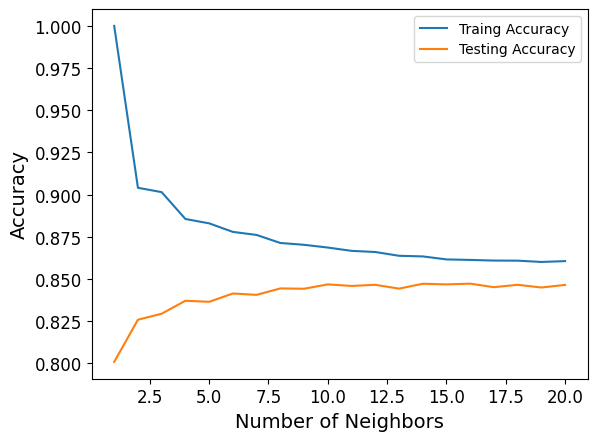

In [80]:
n = np.arange(1,21)

atrain = np.empty(20)   
atest  = np.empty(20)

for i,k in enumerate(n):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train,y_train)
    atrain[i]= model.score(x_train,y_train)
    atest[i] = model.score(x_test,y_test)
    
plt.plot(n , atrain , label = 'Traing Accuracy')
plt.plot(n , atest  , label = 'Testing Accuracy')   
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')

Finding The most appropriate  K for our model using above code 

In [274]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree              import  DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler  
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)
confusion_matrix(y_test,yKNN_predict)

array([[11418,  1017],
       [ 1726,  2120]], dtype=int64)

In [296]:
accuracy_score(y_test,yKNN_predict)

0.8315214053190836

estimate model accuracy  for test_set

In [256]:
print(classification_report(y_test,yKNN_predict))

              precision    recall  f1-score   support

       <=50K       0.87      0.92      0.89     12435
        >50K       0.68      0.55      0.61      3846

    accuracy                           0.83     16281
   macro avg       0.77      0.73      0.75     16281
weighted avg       0.82      0.83      0.83     16281



above table shows precision ,recall ,f1-score ,support

"cm" is the variable for our Confusion Matrix.<br>
Accuracy, Precision, Recall, and f1_Score are evaluation metrics used by related functions from sklearn.metrics.

In [281]:
cm_KNN = confusion_matrix(y_test, yKNN_predict)
accuracy_KNN = accuracy_score(y_test, yKNN_predict)
precision_KNN = precision_score(y_test, yKNN_predict, average='micro')
recall_KNN = recall_score(y_test, yKNN_predict, average='micro')
f1score_KNN = f1_score(y_test, yKNN_predict, average='micro')

To show TrueNegatives, FalsePositives, FalseNegatives, and TruePositives in a linear order.

In [279]:
tn_KNN, fp_KNN, fn_KNN, tp_KNN = confusion_matrix(y_test, yKNN_predict).ravel()
tn_KNN, fp_KNN, fn_KNN, tp_KNN

(11418, 1017, 1726, 2120)

Print the evatuatiion metrics

In [289]:
print(f"Accuracy_KNN = {accuracy_KNN}")
print(f"Precision_KNN = {precision_KNN}")
print(f"Recall_KNN= {recall_KNN}")
print(f"F1 Score_KNN = {f1score_KNN}")

Accuracy_KNN = 0.8315214053190836
Precision_KNN = 0.8315214053190836
Recall_KNN= 0.8315214053190836
F1 Score_KNN = 0.8315214053190836


According to the metrics above we find out that:<br>
Our model correctly predicted 83.15% of the cases.<br>
Out of all the cases that our model predicted as positive, 83.15% of them were actually positive.<br>
Out of all the actual positive cases, your model predicted 83.15% of them as positive.<br>
F1 score is 0.8315214053190836, which means that our model has a balanced performance in terms of precision and recall.<br>


SVM

In [239]:
#we arrange x_train and y_train for training the model and then with x_test and y_test
# we test how accurate the model is
x_train = Train_set_scaled 
y_train = y_train_set              
x_test =  Test_set_scaled 
y_test = y_test_set      

We reuse the x_train and y_train data (labels) from the train section and the x_test and y_test data that we processed earlier.

In [238]:
#important imports
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
#import useful functions from sklearn
from sklearn.svm import SVC
from  sklearn         import  metrics
from  sklearn.metrics import  accuracy_score
from  sklearn.metrics import  precision_score
from  sklearn.metrics import  recall_score
from  sklearn.metrics import  f1_score
from  sklearn.metrics import  confusion_matrix
from  sklearn.metrics import  ConfusionMatrixDisplay
from  sklearn.metrics import  classification_report
from  sklearn.model_selection import  cross_val_score
from  sklearn.model_selection import  train_test_split
from  sklearn.model_selection import  GridSearchCV

We call the necessary libraries according to the usual habit at the beginning and call the required functions in the sklearn library separately so that from now on they can be recalled by bringing the names of the functions. And the following functions are important for evaluation, which we will discuss further.)

In [257]:
#in this part the model is made with a linear kernel
clf = SVC(kernel = "linear")

#after using x_train and y_train as an input the model training is done now and is ready to predict new test's output
clf.fit(x_train , y_train)

#we put x_test as the input in our model and its prediction is called y-pred
ySVM_pred = clf.predict(x_test)

# we are going to compare the real output(y_test)
#and the predicted output in forward

First, we model the backup machine with the help of a linear kernel that performs the classification with a dividing line and separates the labels from each other.
In the following, we put x_train and y_train values to the designed model with the help of fit function and it is trained based on them.
Finally, we give the values of x_test as input to the model, and with the help of the predict function, the machine predicts the labels, and then we are going to compare the predicted values with the actual values.

In [241]:
clf.support_vectors_

array([[0.30136986, 0.85714286, 0.12338892, ..., 0.        , 0.39795918,
        0.95      ],
       [0.45205479, 0.71428571, 0.13516885, ..., 0.        , 0.12244898,
        0.95      ],
       [0.20547945, 0.42857143, 0.61056959, ..., 0.        , 0.5       ,
        0.95      ],
       ...,
       [0.30136986, 0.14285714, 0.22307941, ..., 0.        , 0.19387755,
        0.95      ],
       [0.49315068, 0.42857143, 0.87374694, ..., 0.        , 0.39795918,
        0.95      ],
       [0.31506849, 0.42857143, 0.37326188, ..., 0.        , 0.39795918,
        0.95      ]])

In [242]:
#get indices of support vectors
clf.support_

array([    0,     1,    13, ..., 32545, 32554, 32557])

In [244]:
#get number of support vectors for each class
clf.n_support_

array([6754, 6745])

We have obtained and displayed some necessary values.

In [258]:
accuracy_score(y_test, ySVM_pred)

0.814262023217247

The accuracy value of this predictive model is relative to the actual values of this value and can predict the data labels correctly to an acceptable extent.

In [262]:
confusion_matrix(y_test, ySVM_pred )

array([[12092,   343],
       [ 2681,  1165]], dtype=int64)

The output of the clutter matrix is the values of TP, FP, FN, and TN, respectively.
Here, labels smaller than 50 are assumed to be positive labels and labels greater than 50 are assumed to be negative.

In [259]:
print(classification_report(y_test,ySVM_pred))

              precision    recall  f1-score   support

       <=50K       0.82      0.97      0.89     12435
        >50K       0.77      0.30      0.44      3846

    accuracy                           0.81     16281
   macro avg       0.80      0.64      0.66     16281
weighted avg       0.81      0.81      0.78     16281



The F1 score can be interpreted as a harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is:
F1 = 2 * (precision * recall) / (precision + recall)

In [282]:
cm_SVM = confusion_matrix(y_test, ySVM_pred)
accuracy_SVM = accuracy_score(y_test, ySVM_pred)
precision_SVM = precision_score(y_test, ySVM_pred, average='micro')
recall_SVM = recall_score(y_test, ySVM_pred, average='micro')
f1score_SVM = f1_score(y_test, ySVM_pred, average='micro')

To show TrueNegatives, FalsePositives, FalseNegatives, and TruePositives in a linear order.

In [283]:
tn_SVM, fp_SVM, fn_SVM, tp_SVM = confusion_matrix(y_test, ySVM_pred).ravel()
tn_SVM, fp_SVM, fn_SVM, tp_SVM

(12092, 343, 2681, 1165)

Print the evatuatiion metrics

In [288]:
print(f"Accuracy_SVM = {accuracy_SVM }")
print(f"Precision_SVM = {precision_SVM }")
print(f"Recall_SVM = {recall_SVM }")
print(f"F1 Score_SVM = {f1score_SVM }")

Accuracy_SVM = 0.814262023217247
Precision_SVM = 0.814262023217247
Recall_SVM = 0.814262023217247
F1 Score_SVM = 0.814262023217247


According to the metrics above we find out that:<br>
Our model correctly predicted 81.42% of the cases.<br>
Out of all the cases that our model predicted as positive, 81.42% of them were actually positive.<br>
Out of all the actual positive cases, your model predicted 81.42% of them as positive.<br>
F1 score is 0.814262023217247, which means that our model has a balanced performance in terms of precision and recall.<br>


Decision Trees


In [52]:
x_train = Train_set_scaled     
y_train = y_train_set     
x_test =  Test_set_scaled      
y_test = y_test_set         

Importing needed libraries

In [263]:
from sklearn.tree              import  DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler  
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

Using DecisionTreeClassifier to build a model with proper attributes.<br>
The "gini" criterion is much faster because it is less computationally expensive.<br>
The more the value of max_depth, the more complex your tree will be. So "4" is a fair amount.<br>
To obtain a deterministic behaviour during fitting, "random_state" has to be fixed to an integer(0).<br>

In [264]:
DT  = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=0)

The next step is fitting Decision Tree model on "x_train" and "y_train".<br>
It means to teach our model.

In [266]:
DT.fit (x_train , y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

Afterwards we predict our model using our "x_test" data set and use ypDT variable for the ys predicted by our Decision Tree model.

In [267]:
yDT_pred= DT.predict(x_test)

"Classification_report" gives a report on the performance of the predicted ys by our Decision Tree model.<br>
The report says there were 16281 records for test which 12435 belonged to Class with Target 1 and 3846 records belonged to Class with Target 2.<br>
It shows all precision, recall, and f1-score to show the preformance of this prediction.

In [268]:
print(classification_report(y_test, yDT_pred))

              precision    recall  f1-score   support

       <=50K       0.86      0.95      0.90     12435
        >50K       0.75      0.51      0.61      3846

    accuracy                           0.84     16281
   macro avg       0.81      0.73      0.76     16281
weighted avg       0.84      0.84      0.83     16281



"cm" is the variable for our Confusion Matrix.<br>
Accuracy, Precision, Recall, and f1_Score are evaluation metrics used by related functions from sklearn.metrics.

In [286]:
cm_DT = confusion_matrix(y_test, yDT_pred)
accuracy_DT = accuracy_score(y_test, yDT_pred)
precision_DT = precision_score(y_test, yDT_pred, average='micro')
recall_DT = recall_score(y_test, yDT_pred, average='micro')
f1score_DT = f1_score(y_test, yDT_pred, average='micro')

To show TrueNegatives, FalsePositives, FalseNegatives, and TruePositives in a linear order.

In [285]:
tn_DT, fp_DT, fn_DT, tp_DT = confusion_matrix(y_test, yDT_pred).ravel()
tn_DT, fp_DT, fn_DT, tp_DT

(11775, 660, 1876, 1970)

Print the evatuatiion metrics

In [287]:
print(f"Accuracy_DT = {accuracy_DT}")
print(f"Precision_DT = {precision_DT}")
print(f"Recall_DT = {recall_DT}")
print(f"F1 Score_DT = {f1score_DT}")

Accuracy_DT = 0.8442356120631411
Precision_DT = 0.8442356120631411
Recall_DT = 0.8442356120631411
F1 Score_DT = 0.8442356120631411


According to the metrics above we find out that:<br>
Our model correctly predicted 84.25% of the cases.<br>
Out of all the cases that our model predicted as positive, 84.25% of them were actually positive.<br>
Out of all the actual positive cases, your model predicted 84.25% of them as positive.<br>
F1 score is 0.8425158159818193, which means that our model has a balanced performance in terms of precision and recall.<br>


Comparison of performance of models